# Создаем Graph и рисуем точки

Welcome to JupyROOT 6.18/04


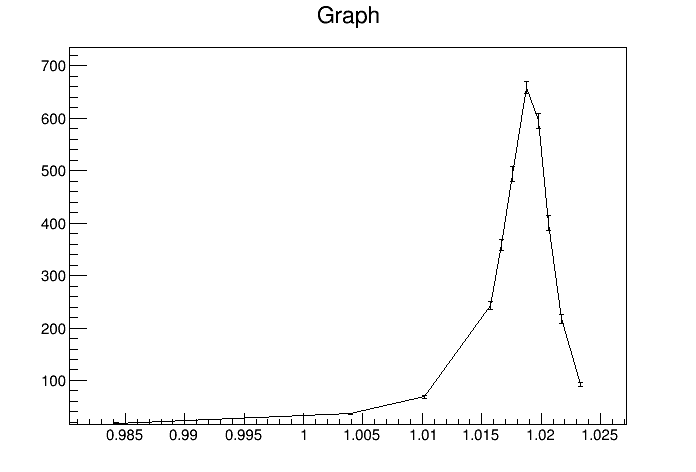

In [1]:
import ROOT

c = ROOT.TCanvas()

g = ROOT.TGraphErrors('./variant1.txt')
g.Draw()
c.Draw()

### Прикинуть из графика начальные параметры(высота пика А, положение М, ширина по полувысоте Г)

In [2]:
A = 650 ##цена деления = 20, у нас получается 600 + ~2,5 деления
M = 1.019 ##цена деления = 0,001
G = 0.005 ##полувысота 325 : G =1.021 - 1.016

## Подогнать функцией, получить параметры из ошибки, xi^2/Ndf, вероятность

In [3]:
def func(xx, pp):  #объявляем функцию
    A = pp[0]
    G = pp[1]
    M = pp[2]
    Ei = xx[0]
    g2 = (G*1.0/2)**2
    
    result = A*g2/(((Ei-M)**2)+g2)
    return result

dE = 0.0001
de = 0.01

In [4]:
f = ROOT.TF1( "func", func, 0.9, 1.1, 3)

In [5]:
f.SetParameter(0,A)
f.SetParameter(1,G)
f.SetParameter(2,M)

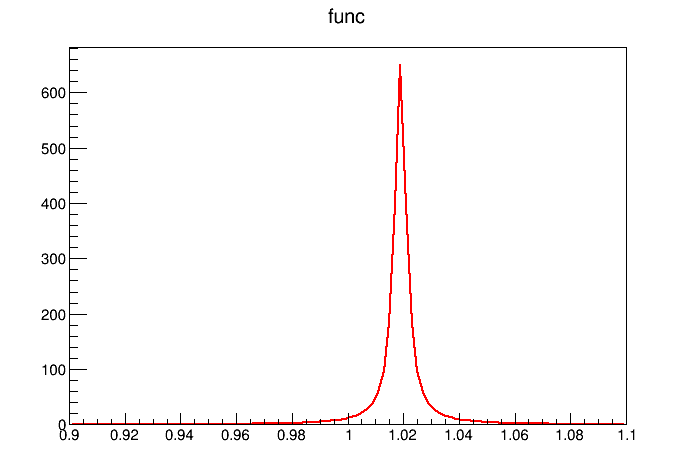

In [6]:
f.Draw()
c.Draw()

In [7]:
r = g.Fit( f, "S" ) ##сохраняет результат в TFitResultPtr???
r.Print()

 FCN=801.248 FROM MIGRAD    STATUS=CONVERGED      72 CALLS          73 TOTAL
                     EDM=4.50794e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.44648e+02   9.91983e+00   8.26234e-02   3.21075e-05
   2  p1           4.69357e-03   8.08952e-05   6.60538e-07   3.89808e+00
   3  p2           1.01858e+00   2.90706e-05   4.85697e-07  -6.87247e+00

****************************************
Minimizer is Minuit / Migrad
Chi2                      =      801.248
NDf                       =            8
Edm                       =  4.50794e-08
NCalls                    =           73
p0                        =      644.648   +/-   9.91983     
p1                        =   0.00469357   +/-   8.08952e-05 
p2                        =      1.01858   +/-   2.90706e-05 


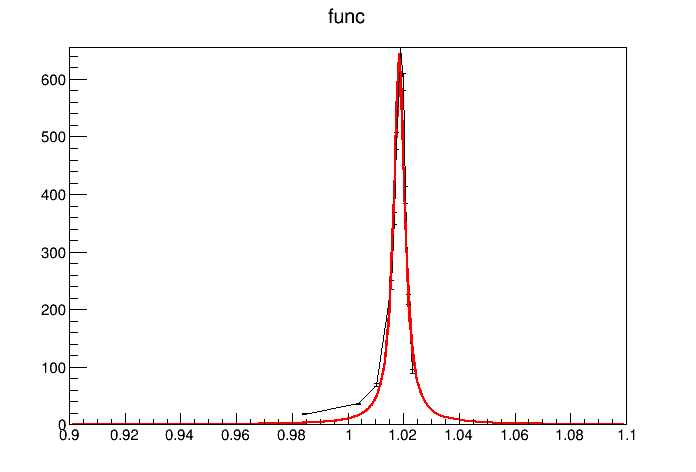

In [8]:
g.Draw()
c.Draw()

In [9]:
print("Значение параметра А =      ", r.Value(0)) ##Значение первого параметра
print("Стат. Ошибка параметра А =  ",r.Error(0)) ##Стат Ошибка первого параметра

Значение параметра А =       644.6475668032156
Стат. Ошибка параметра А =   9.919825191802206


In [10]:
print("Значение параметра G =      ", r.Value(1)) ##Значение второго параметра
print("Стат. Ошибка параметра G =  ",r.Error(1)) ##Стат Ошибка второго параметра

Значение параметра G =       0.0046935699820817925
Стат. Ошибка параметра G =   8.08951650527384e-05


In [11]:
print("Значение параметра М =      ", r.Value(2)) ##Значение первого параметра
print("Стат. Ошибка параметра М =  ",r.Error(2)) ##Стат Ошибка первого параметра

Значение параметра М =       1.0185810569487184
Стат. Ошибка параметра М =   2.907063827584711e-05


In [12]:
chi2 = r.Chi2() #xi^2
print("xi^2 = ", chi2,"/n")

ndf = r.Ndf() #Ndf - кол-во встепеней свободы
print("Ndf = ", ndf, "/n")

res = chi2/ndf
print("xi^2/Ndf = ",res, "/n")

prob = ROOT.TMath.Prob(chi2, ndf)
print("p = ", prob, "/n")

xi^2 =  801.2477205266044 /n
Ndf =  8 /n
xi^2/Ndf =  100.15596506582555 /n
p =  1.1081116669758377e-167 /n


## По эффективности:

In [13]:
hA_eff = ROOT.TH1F("hA-effective","A",100,620,670)
hG_eff = ROOT.TH1F("hG-effective","G",100,0.00455,0.00485)
hM_eff = ROOT.TH1F("hM-effective","M",100,1.018,1.019)

xs = g.GetX()
ys = g.GetY()
de = 0.01

f.SetParameter(0,A)
f.SetParameter(1,G)
f.SetParameter(2,M)

for i in range(1000):
    
    print("iter E",i)
    gr1=ROOT.TGraphErrors(g)
    for j in range (g.GetN()):
        dE = ys[j]*de*xs[j]/1.020  ##1.02/Gev
        s = ROOT.gRandom.Gaus(0 , dE) 
        gr1.SetPoint(j, xs[j], s + ys[j])
        gr1.SetPointError(j, g.GetErrorX(j), g.GetErrorY(j))
    fit=gr1.Fit(f,"S")
    fit.Print()
    r1=fit.Value(0)
    r2=fit.Value(1)
    r3=fit.Value(2)
    print(r1, r2, r3)
    hA_eff.Fill(r1)
    hG_eff.Fill(r2)
    hM_eff.Fill(r3)

iter E 0
639.2786175436997 0.004746323617969052 1.0185731697892442
iter E 1
644.464886795309 0.0046698947994219244 1.0185940888499303
iter E 2
648.6482971960343 0.004679652221226324 1.0185905260081454
iter E 3
640.3205918534296 0.004728525394096884 1.018573073544213
iter E 4
635.4651464888534 0.004751567481219336 1.0185892493494495
iter E 5
646.6980409931269 0.004632569278992132 1.0186069118472751
iter E 6
642.9165207009669 0.004698910952935897 1.018587975859547
iter E 7
642.3781369993816 0.004713845274954851 1.018560380476061
iter E 8
643.6418156650575 0.004710560347662873 1.0185783815776124
iter E 9
644.4136580718176 0.004693406817329969 1.0185898491857612
iter E 10
642.263890581144 0.004666748813466221 1.0185891289446527
iter E 11
646.6769645739273 0.004672457532451036 1.018585689198926
iter E 12
643.9499843749702 0.004676447845091153 1.0185942350389856
iter E 13
642.2049796506641 0.004714478512161161 1.0185716896692159
iter E 14
644.9772716685674 0.00469819585514702 1.0185903143405

Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warn

In [14]:
c.Clear()

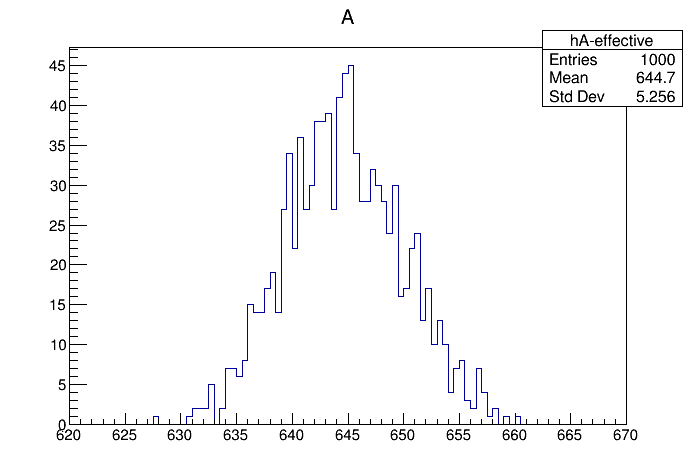

In [15]:
hA_eff.Draw()
c.Draw()

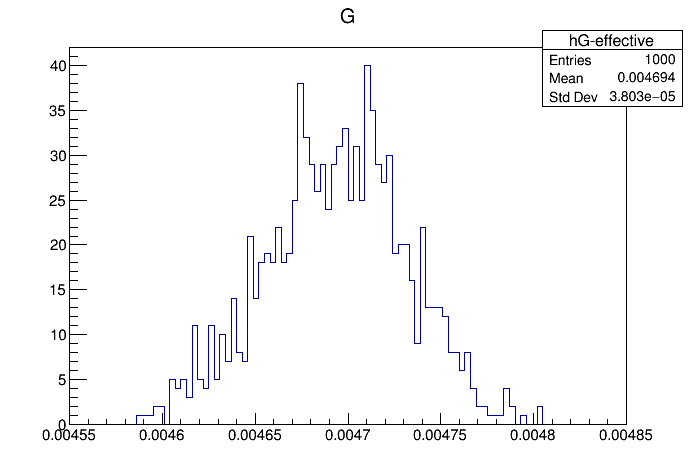

In [16]:
hG_eff.Draw()
c.Draw()

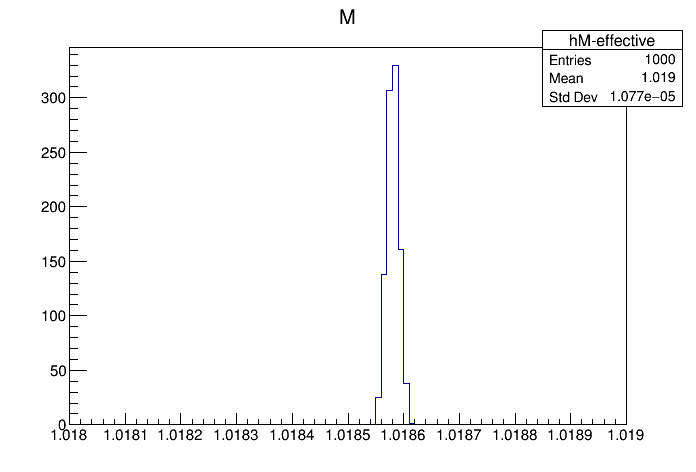

In [17]:
hM_eff.Draw()
c.Draw()

In [18]:
print('Ошибка А = ',hA_eff.GetRMS())
print('Ошибка G = ',hG_eff.GetRMS())
print('Ошибка M = ',hM_eff.GetRMS())

Ошибка А =  5.256422176493945
Ошибка G =  3.803068210000899e-05
Ошибка M =  1.077323038599421e-05


## По энергии:

In [19]:
hA_energy = ROOT.TH1F("hA_energy", "A_energy", 100, 644.6, 644.7)
hG_energy = ROOT.TH1F("hG_energy", "G_energy", 100, 0.004693, 0.004694)
hM_energy = ROOT.TH1F("hM_energy", "M_energy", 100, 1.0175, 1.0195)

f.SetParameter(0,A)
f.SetParameter(1,G)
f.SetParameter(2,M)

for j in range(1000): # по энергии: создать гистограммы, в цикле
    gr1 = ROOT.TGraphErrors(g) # создать новый граф
    dE = ROOT.gRandom.Gaus(0, 0.0001) #  0.1Mev смещение dE = RandomNorm(0, ошибка в ГэВ)
    for i in range(g.GetN()): # заполнить E’ -> E+dE; s’ -> s
        gr1.SetPoint(i, xs[i] + dE, ys[i])
        gr1.SetPointError(i, g.GetErrorX(i), g.GetErrorY(i))
    fit=gr1.Fit(f,"S")# подогнать, скинуть значения
    fit.Print()
    r1=fit.Value(0)
    r2=fit.Value(1)
    r3=fit.Value(2)
    print(r1, r2, r3)
    hA_energy.Fill(r1)
    hG_energy.Fill(r2)
    hM_energy.Fill(r3)

644.6469747851577 0.004693580945955458 1.0185587219092862
644.6474297237455 0.004693565296108326 1.0184987028050427
644.6415029166552 0.0046936132066435305 1.0184990828492044
644.6445325298714 0.004693557096706885 1.018683872887823
644.6467655773863 0.004693565592081381 1.0183466889343165
644.6470397035006 0.004693567355470157 1.0186457160157287
644.6472936386011 0.00469356545664459 1.0183676021851151
644.6468570271732 0.004693572088631254 1.018426756132327
644.6474302406522 0.004693565288772119 1.0185127054760517
644.6456816695362 0.00469355957326994 1.0186729832314954
644.6477146868798 0.00469356731933411 1.018454933787175
644.6472335784852 0.004693566298923817 1.0187058700639784
644.6472644684214 0.004693566292168129 1.0186281003195432
644.6468745508322 0.004693567991807042 1.0185133134379383
644.6466349739527 0.0046935620885654086 1.0186423775899605
644.6466076042755 0.004693568950242282 1.0185064443557852
644.6468737027949 0.004693562832026644 1.018623697732162
644.6451139132338 0

Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warn

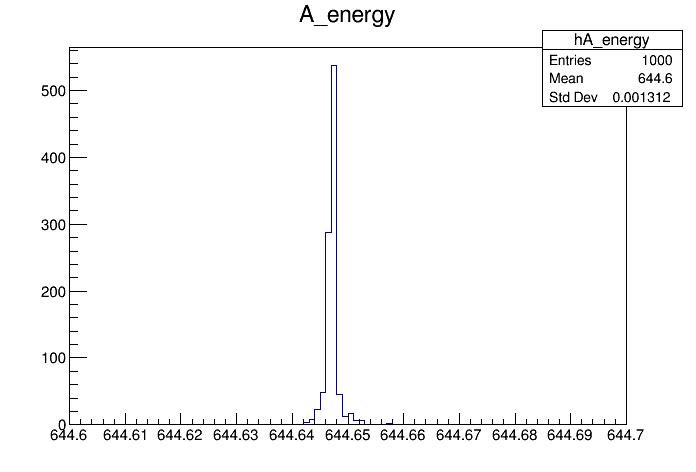

In [20]:
c.Clear()

hA_energy.Draw()
c.Draw()

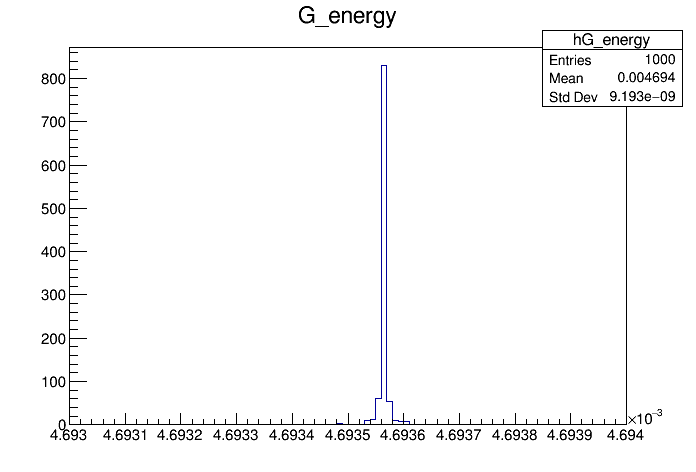

In [21]:
hG_energy.Draw()
c.Draw()

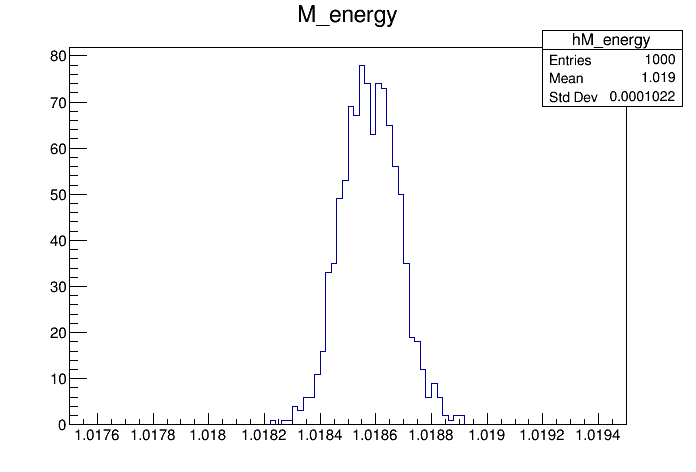

In [22]:
hM_energy.Draw()
c.Draw()

In [23]:
print('Ошибка по энергии А = ',hA_energy.GetRMS()) #среднеквадратичная ошибка
print('Ошибка по энергии G = ',hG_energy.GetRMS())
print('Ошибка по энергии M = ',hM_energy.GetRMS())

Ошибка по энергии А =  0.0013121893222707154
Ошибка по энергии G =  9.193309930434962e-09
Ошибка по энергии M =  0.0001022417014066927


In [24]:
print('Ошибка по эффективности А = ',hA_eff.GetRMS())
print('Ошибка по эффективности G = ',hG_eff.GetRMS())
print('Ошибка по эффективности M = ',hM_eff.GetRMS())

Ошибка по эффективности А =  5.256422176493945
Ошибка по эффективности G =  3.803068210000899e-05
Ошибка по эффективности M =  1.077323038599421e-05


## Объяснить, какой вклад ожидался, сравнить с полученным

Оценка по энергии

In [26]:
dE = 0.0001

print('M energy RMS:', hM_energy.GetRMS())
print('M exp:', dE)

print('\nA energy RMS:', hA_energy.GetRMS())
print('A energy exp:', 0)

print('\nG energy RMS:', hG_energy.GetRMS())
print('G energu exp:', 0)

M energy RMS: 0.0001022417014066927
M exp: 0.0001

A energy RMS: 0.0013121893222707154
A energy exp: 0

G energy RMS: 9.193309930434962e-09
G energu exp: 0


Если посмотреть на формулу, то видим, если немного изменить энергию на dE, то для того, чтобы значение sigma не изменилось, достаточно изменить М на ту же величину. Потому dM=dE. Изменение энергии - это просто параллельный перенос вдоль оси энергии.

Оценка по эффективности:

In [49]:
hA_eff_p = ROOT.TH1F("hA-effective-pred","A",100,620,670)
hG_eff_p = ROOT.TH1F("hG-effective-ored","G",100,0.00455,0.00485)
hM_eff_p = ROOT.TH1F("hM-effective-pred","M",100,1.018,1.019)

xs = g.GetX()
ys = g.GetY()
de = 0.01

f.SetParameter(0,A)
f.SetParameter(1,G)
f.SetParameter(2,M)

gr1 = ROOT.TGraphErrors(g)
for i in range(g.GetN()): # заполнить E’ -> E+dE; s’ -> s
        gr1.SetPoint(i, xs[i], ys[i])
        gr1.SetPointError(i, g.GetErrorX(i), 0.01 * ys[i]*xs[i]/1.02)
fit=gr1.Fit(f,"S")
print("Стат. Ошибка параметра А =  ",fit.Error(0))
print("Стат. Ошибка параметра G =  ",fit.Error(1))
print("Стат. Ошибка параметра M =  ",fit.Error(2))
#for in range (length(ys))

Стат. Ошибка параметра А =   4.707128374128802
Стат. Ошибка параметра G =   5.013227819847544e-05
Стат. Ошибка параметра M =   1.3712566183781533e-05
 FCN=13298 FROM MIGRAD    STATUS=CONVERGED      93 CALLS          94 TOTAL
                     EDM=1.0729e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.36780e+02   4.70713e+00   9.65168e-02  -1.48025e-04
   2  p1           5.68436e-03   5.01323e-05   9.69008e-07   2.17263e+01
   3  p2           1.01831e+00   1.37126e-05   5.83561e-07   1.24320e+02


Warning in <TROOT::Append>: Replacing existing TH1: hA-effective-pred (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hG-effective-ored (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hM-effective-pred (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).


In [50]:
print('Ошибка по эффективности А = ',hA_eff.GetRMS())
print('Ошибка по эффективности G = ',hG_eff.GetRMS())
print('Ошибка по эффективности M = ',hM_eff.GetRMS())
print("")
print("Стат. Ошибка параметра А =  ",fit.Error(0))
print("Стат. Ошибка параметра G =  ",fit.Error(1))
print("Стат. Ошибка параметра M =  ",fit.Error(2))

Ошибка по эффективности А =  5.256422176493945
Ошибка по эффективности G =  3.803068210000899e-05
Ошибка по эффективности M =  1.077323038599421e-05

Стат. Ошибка параметра А =   4.707128374128802
Стат. Ошибка параметра G =   5.013227819847544e-05
Стат. Ошибка параметра M =   1.3712566183781533e-05
